<a href="https://colab.research.google.com/github/samsonkadarikota/Deep-Learning/blob/main/Image_classifying_using_Max_pooling.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Mood classification using CNN (HAPPY / SAD)

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
!nvidia-smi

Tue Aug 26 14:54:00 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   56C    P8             10W /   70W |       0MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [3]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing import image
import matplotlib.pyplot as plt
import tensorflow as tf
import numpy as np
import cv2
import os
# image data generator is the package to lable the images & it will automatically lable all the images

In [4]:
img = image.load_img('/content/drive/MyDrive/19. CNNN - Happy or Sad/training/Happy/3.jpg.jpg')

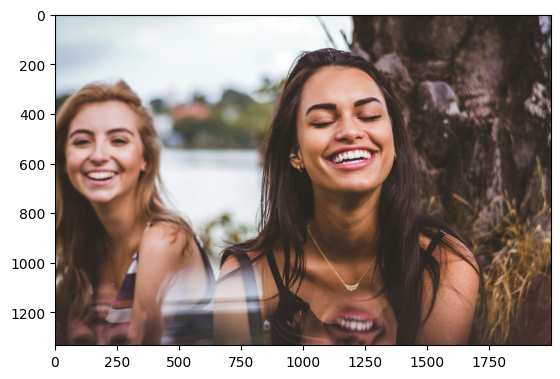

In [5]:
plt.imshow(img)

In [6]:
il = cv2.imread('/content/drive/MyDrive/19. CNNN - Happy or Sad/training/Happy/3.jpg.jpg')
il
# 3 dimension metrics are created for the image
# the value ranges from 0-255

array([[[216, 206, 188],
        [216, 206, 188],
        [216, 206, 188],
        ...,
        [120,  98, 103],
        [124,  98, 104],
        [125,  99, 105]],

       [[217, 207, 189],
        [217, 207, 189],
        [217, 207, 189],
        ...,
        [121,  99, 104],
        [124,  98, 104],
        [124,  98, 104]],

       [[217, 207, 189],
        [217, 207, 189],
        [217, 207, 189],
        ...,
        [125, 102, 110],
        [126, 100, 106],
        [124,  98, 104]],

       ...,

       [[ 46,  48,  58],
        [ 46,  48,  58],
        [ 45,  47,  57],
        ...,
        [ 49,  49,  73],
        [ 49,  49,  73],
        [ 48,  48,  72]],

       [[ 46,  48,  58],
        [ 45,  47,  57],
        [ 45,  47,  57],
        ...,
        [ 49,  49,  73],
        [ 49,  49,  73],
        [ 48,  48,  72]],

       [[ 45,  47,  57],
        [ 45,  47,  57],
        [ 45,  47,  57],
        ...,
        [ 49,  49,  73],
        [ 49,  49,  73],
        [ 48,  48,  72]]

In [7]:
il.shape
# shape of your image height, weight, rgb

(1333, 2000, 3)

In [8]:
train = ImageDataGenerator(rescale=1/200)
validation = ImageDataGenerator(rescale=1/200)
# to scale all the images i need to divide with 255
# we need to resize the images using 200, 200 pixel

In [9]:
train_dataset = train.flow_from_directory('/content/drive/MyDrive/19. CNNN - Happy or Sad/training',
                                        target_size = (200,200),
                                        batch_size = 32,
                                        class_mode = 'binary')
validation_dataset = validation.flow_from_directory('/content/drive/MyDrive/19. CNNN - Happy or Sad/validation',
                                        target_size = (200, 200),
                                        batch_size = 32,
                                        class_mode = 'binary')

Found 11 images belonging to 3 classes.
Found 0 images belonging to 0 classes.


In [22]:
train_dataset.class_indices

{'.ipynb_checkpoints': 0, 'Happy': 1, 'Not Happy': 2}

In [23]:
train_dataset.classes

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2], dtype=int32)

In [28]:
# now we are applying maxpooling

model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(16,(3,3),activation = 'relu',input_shape = (200,200,3)), # 3 is the number of color channels
    tf.keras.layers.MaxPool2D(2,2), #3 filter we applied hear
    #
    tf.keras.layers.Conv2D(32,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    #
    tf.keras.layers.Conv2D(64,(3,3),activation = 'relu'),
    tf.keras.layers.MaxPool2D(2,2),
    ##
    tf.keras.layers.Flatten(),
    ##
    tf.keras.layers.Dense(512, activation = 'relu'),
    #
    tf.keras.layers.Dense(1,activation= 'sigmoid') # Activation function for binary classification should be sigmoid
])

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [30]:
model.compile(loss='binary_crossentropy',
              optimizer = tf.keras.optimizers.RMSprop(learning_rate = 0.001),
              metrics = ['accuracy']
              )

In [31]:
model_fit = model.fit(train_dataset,epochs = 15)

/usr/local/lib/python3.12/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 8s 8s/step - accuracy: 0.5455 - loss: 0.4379
Epoch 2/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: -41.9880
Epoch 3/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: -173.9544
Epoch 4/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: -521.9077
Epoch 5/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: -1308.6018
Epoch 6/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: -2905.5610
Epoch 7/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: -5881.2729
Epoch 8/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5455 - loss: -11088.1240
Epoch 9/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: -19567.2598
Epoch 10/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: -32213.6055
Epoch 11/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step - accuracy: 0.5455 - loss: -49919.0625
Epoch 12/15
1/1 ━━━━━━━━━━━━━━━━━━━━ 5s 5s/step - accuracy: 0.5455 

In [32]:
dir_path = '/content/drive/MyDrive/19. CNNN - Happy or Sad/testing'
for i in os.listdir(dir_path ):
  print(i)
  #img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
  # plt.imshow(img)
  #plt.show()

pexels-danxavier-908602.jpg
pexels-akshar-dave-977971.jpg
pexels-elina-sazonova-1927306.jpg
pexels-hannah-nelson-390257-1456951.jpg
pexels-sherlocked124578-59196.jpg
pexels-andre-furtado-43594-1804821.jpg
pexels-jopwell-2422293.jpg
pexels-danxavier-1239291.jpg
pexels-jonathon-burton-1310223-2529142.jpg
pexels-sobhan-joodi-1403583-3151787.jpg
pexels-shvetsa-3771681.jpg
pexels-ricrodrigues-1278566.jpg
pexels-visoesdomundo-2345374.jpg
pexels-shvetsa-3905727.jpg
pexels-shvetsa-4226218.jpg


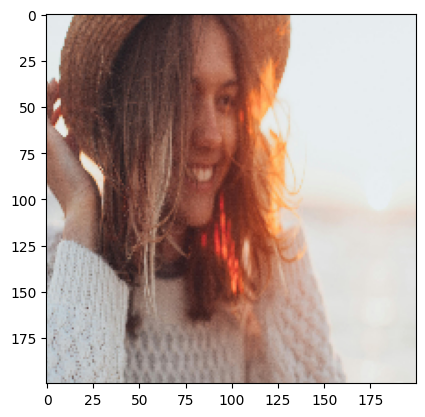

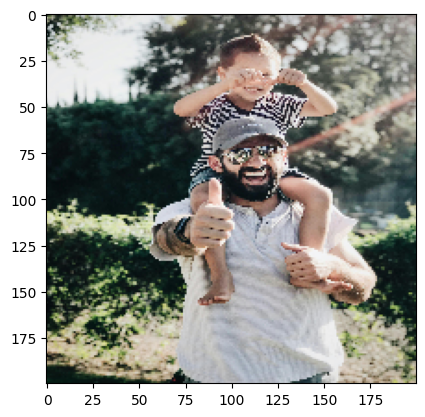

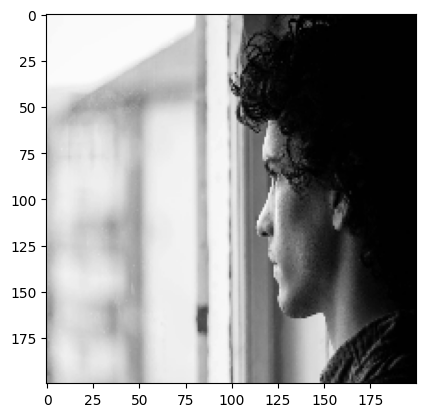

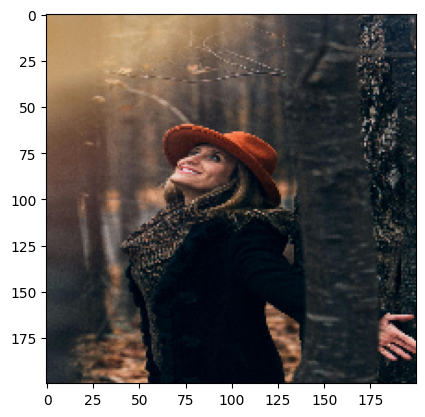

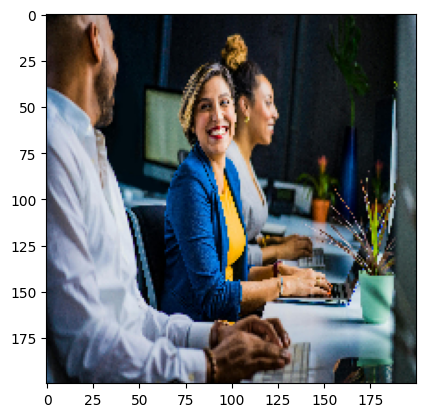

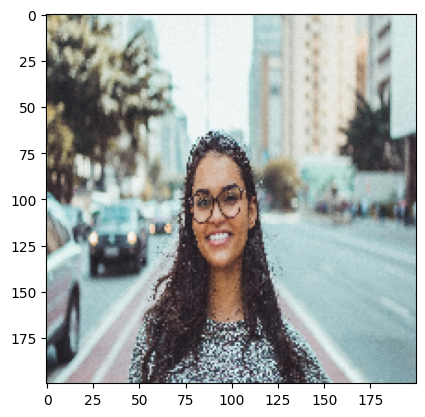

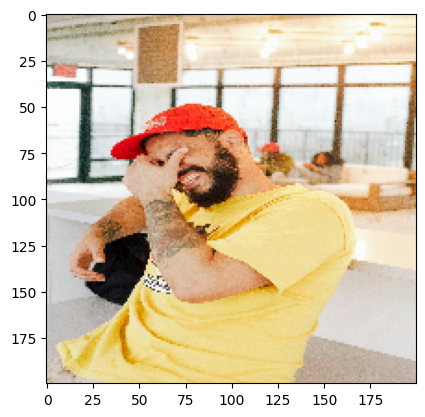

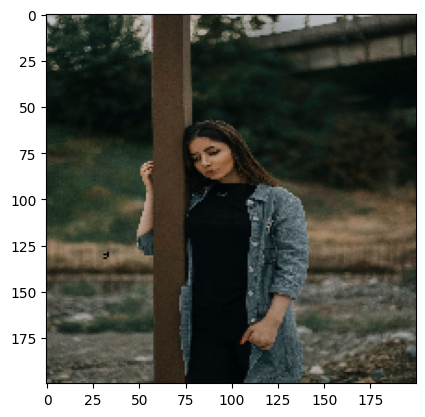

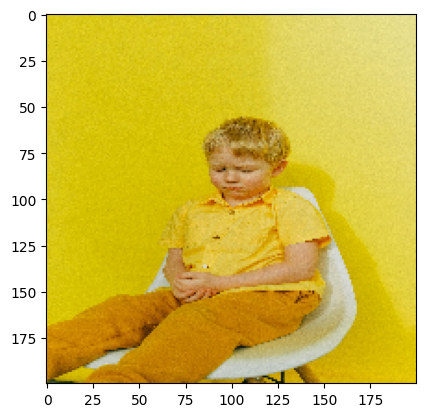

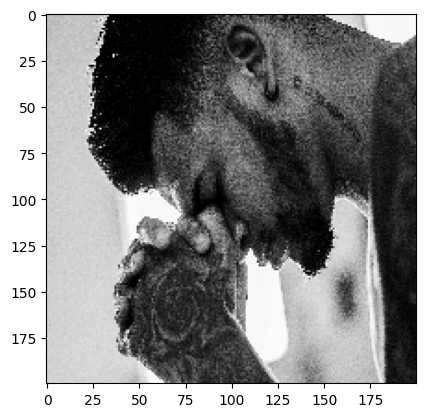

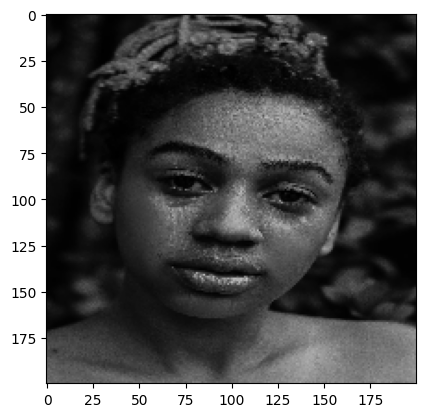

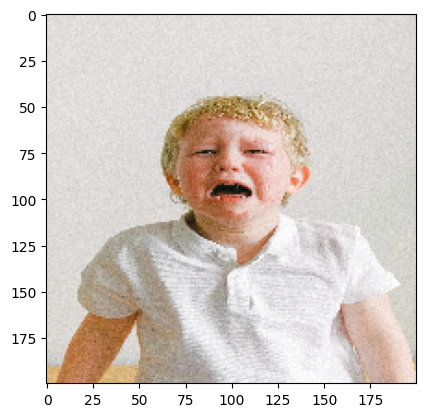

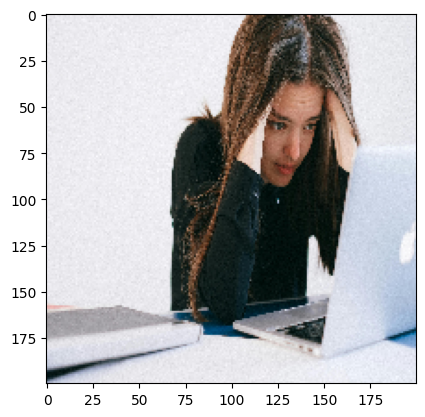

In [33]:
dir_path = '/content/drive/MyDrive/19. CNNN - Happy or Sad/testing'

for i in os.listdir(dir_path ):
  img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
  plt.imshow(img)
  plt.show()

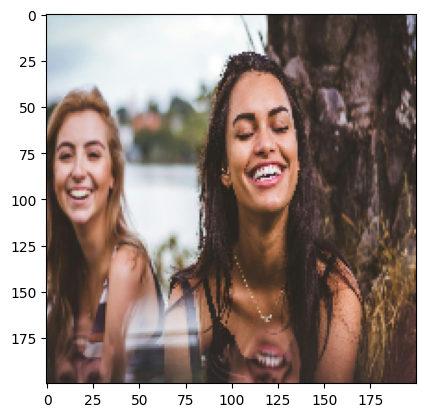

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 973ms/step
i am not happy


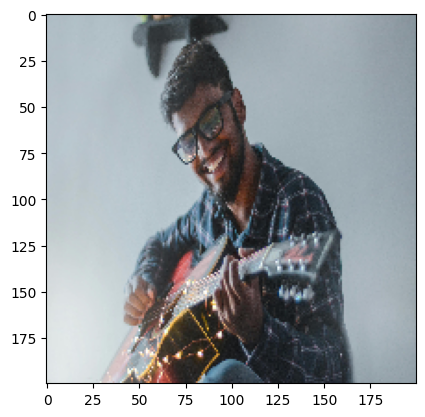

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
i am not happy


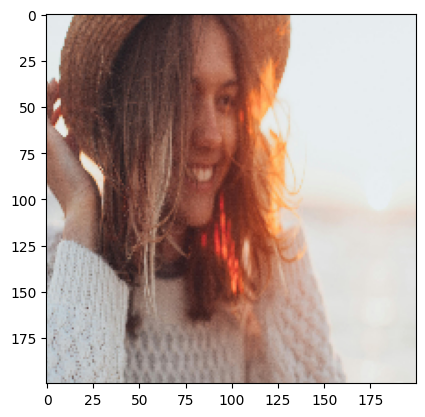

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step
i am not happy


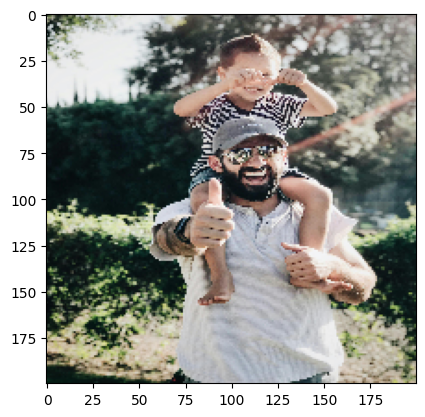

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
i am not happy


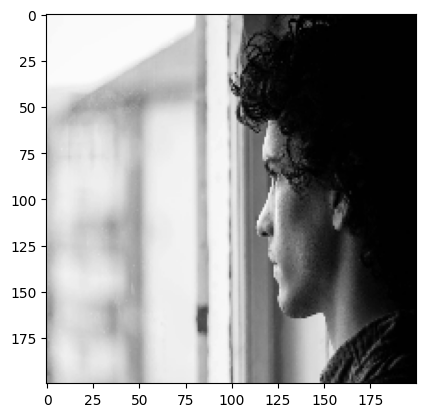

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
i am not happy


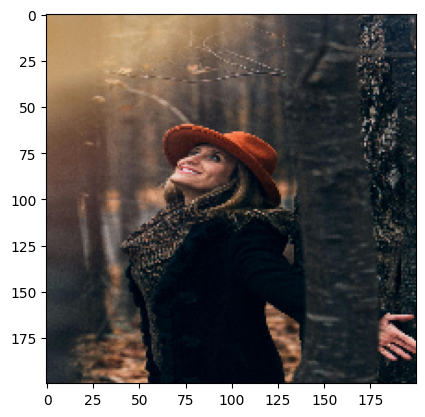

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 42ms/step
i am not happy


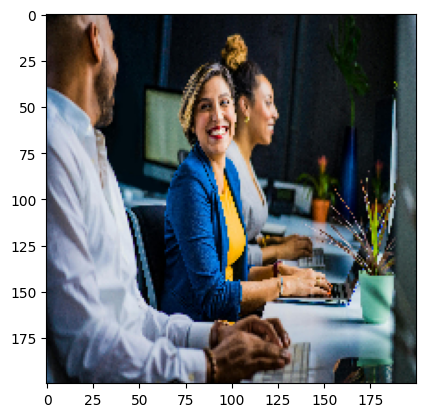

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step
i am not happy


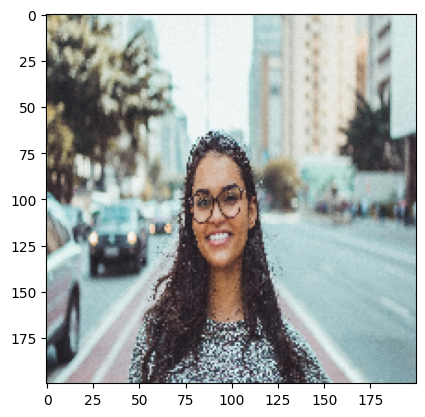

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
i am not happy


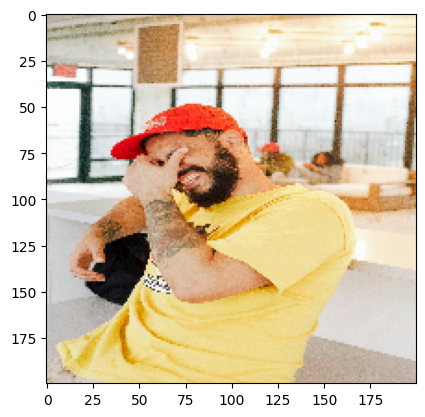

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 49ms/step
i am not happy


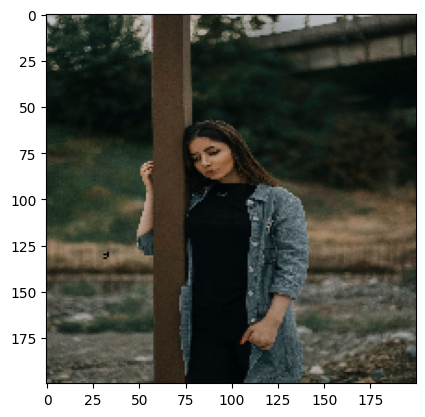

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
i am not happy


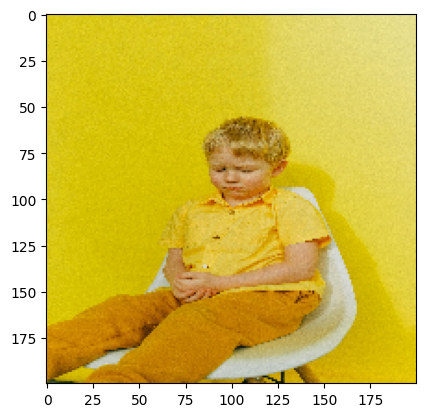

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
i am not happy


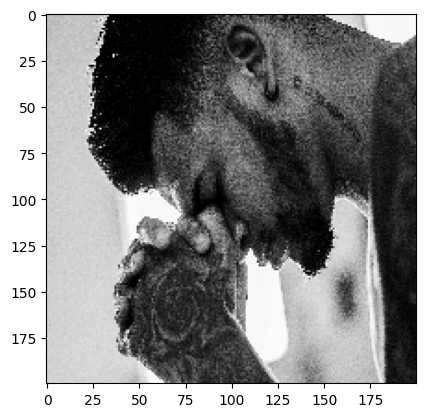

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
i am not happy


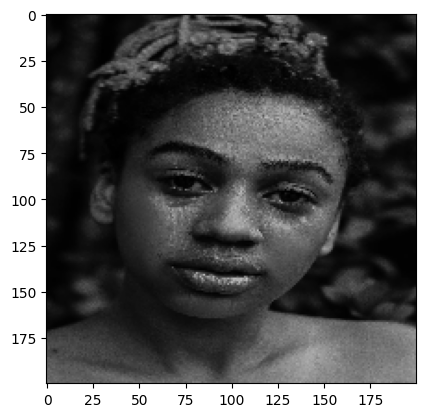

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 188ms/step
i am not happy


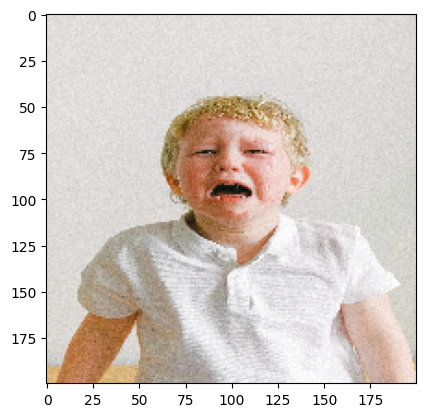

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step
i am not happy


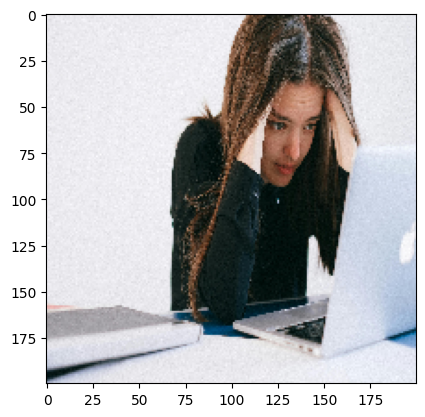

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
i am not happy


In [34]:
dir_path = '/content/drive/MyDrive/19. CNNN - Happy or Sad/testing'
for i in os.listdir(dir_path ):
  img = image.load_img(dir_path+ '//'+i, target_size = (200,200))
  plt.imshow(img)
  plt.show()

  x= image.img_to_array(img)
  x=np.expand_dims(x,axis = 0)
  images = np.vstack([x])

  val = model.predict(images)
  if val == 0:
    print('i am happy')
  else:
    print('i am not happy')

In [36]:
!nvidia-smi

Tue Aug 26 15:30:37 2025       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 550.54.15              Driver Version: 550.54.15      CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  Tesla T4                       Off |   00000000:00:04.0 Off |                    0 |
| N/A   77C    P0             34W /   70W |    2170MiB /  15360MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----